In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline




cuda


In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sbi import utils
from sbi import analysis
from sbi import inference
from sbi.inference import SNPE, SNLE, SNRE, simulate_for_sbi, prepare_for_sbi





In [7]:
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
isim = 0
saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))   
# saved_j.keys()

s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
s2_truth = saved_w[pos + f'_s2_truth_{ihod}']

In [8]:
s0_mock.shape, s0_truth.shape, s1_mock.shape, s1_truth.shape, s2_mock.shape, s2_truth.shape


((3,), (3,), (18,), (18,), (45,), (45,))

In [9]:
# from tqdm import tqdm
# import pickle as pk
# import dill
# ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
# pos = 'rsd'
# isim = 0
# saved_j = pk.load(open(ldir_stats + '/wavelets_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
# saved_j.keys()



In [10]:
from tqdm import tqdm
import pickle as pk
import dill
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
pos = 'rsd'
isim_array = np.arange(0,1800)
x_all = []
x_all_truth = []
theta_all = []
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos_' + str(isim) + '_CMASS.pk', 'rb'))
    try:
        # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos_with_MASS_WEIGHTED_' + str(isim) + '_CMASS.pk', 'rb'))    
        saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
        saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))    

        # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:3][:,None]
        # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:3][:,None]
        
        for ihod in range(10):
            Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3].T
            Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3].T

            Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][1:-1]
            Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][1:-1]

            Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][1:-1]
            Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][1:-1]

            Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][1:-1]
            Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][1:-1]

            s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
            s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

            s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
            s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

            s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
            s2_truth = saved_w[pos + f'_s2_truth_{ihod}']

            # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3))
            # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))

            summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::4], s2_mock[::6]))
            summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::4], s2_truth[::6]))

            # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s0_mock, s1_mock[::3], s2_mock[::6]))
            # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::3], s2_truth[::6]))

            # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock, s2_mock))
            # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth, s2_truth))

            # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock))
            # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth))


            theta_hod = list(saved_j[f'theta_hod_{ihod}'].values())
            theta_cosmo = list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1]
            theta_comb = np.array(theta_cosmo + theta_hod)


            if len(x_all) == 0:
                x_all = summary_concat_mock_all_weighted[None,:]
                x_all_truth = summary_concat_truth_all_weighted[None,:]            
                theta_all = theta_comb[None,:]
            else:
                # x_new = saved_j['summary_concat_mock_all'][None,:]
                # x_new_truth = saved_j['summary_concat_truth_all'][None,:]      
                #       
                # x_new = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]
                # x_new_truth = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]         

                x_new = summary_concat_mock_all_weighted[None,:]
                x_new_truth = summary_concat_truth_all_weighted[None,:]         


                # x_all = np.concatenate((x_all, saved_j['summary_concat_mock_all'][None,:]), axis = 0)
                x_all = np.concatenate((x_all, x_new), axis = 0)       
                x_all_truth = np.concatenate((x_all_truth, x_new_truth), axis = 0)       
                theta_all = np.concatenate((theta_all, theta_comb[None,:]), axis = 0)
        
    except Exception as e:
        print(e)
        pass




100%|██████████| 1800/1800 [01:48<00:00, 16.61it/s]


In [1]:
# !pip install wandb
import wandb
wandb.login()



Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shivampcosmo (shivampcosmo-columbia-univesity). Use `wandb login --relogin` to force relogin


True

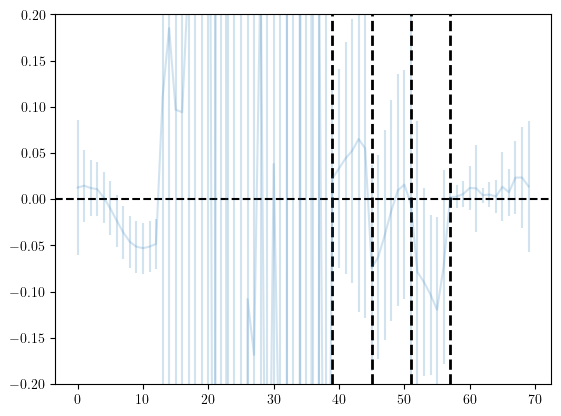

In [11]:
x_all_diff = (x_all - x_all_truth)/x_all_truth
x_all_diff_std = np.std(x_all_diff, axis = 0)
x_all_diff_mean = np.mean(x_all_diff, axis = 0)



pl.figure()
pl.errorbar(np.arange(0, x_all_diff_mean.shape[0]), x_all_diff_mean, yerr = x_all_diff_std, alpha=0.2)
pl.ylim(-0.2, 0.2)
pl.axvline(len(Pk_truth_ds.flatten()), color='k', ls='--', lw=2.0)
pl.axvline(len(Pk_truth_ds.flatten()) + len(Bk_truth_k0p06), color='k', ls='--', lw=2.0)
pl.axvline(len(Pk_truth_ds.flatten()) + len(Bk_truth_k0p06) + len(Bk_truth_k0p2), color='k', ls='--', lw=2.0)
pl.axvline(len(Pk_truth_ds.flatten()) + len(Bk_truth_k0p06) + len(Bk_truth_k0p2) + len(Bk_truth_k0p3), color='k', ls='--', lw=2.0)
pl.axhline(0.0,ls='--', color='k')






In [12]:
x_all_std = np.std(x_all, axis = 0)
x_all_mean = np.mean(x_all, axis = 0)
theta_all_std = np.std(theta_all, axis = 0)
theta_all_mean = np.mean(theta_all, axis = 0)



In [13]:
theta_all


array([[ 0.1755    ,  0.06681   ,  0.7737    , ..., 12.11850531,
        13.15288824,  0.515725  ],
       [ 0.1755    ,  0.06681   ,  0.7737    , ..., 11.96690531,
        13.54126824,  0.625105  ],
       [ 0.1755    ,  0.06681   ,  0.7737    , ..., 12.21368531,
        13.51093824,  0.598285  ],
       ...,
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.86014926,
        13.57529421,  0.521485  ],
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.98876926,
        14.02508421,  0.902965  ],
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.73596926,
        13.71980421,  0.930265  ]])

In [14]:
theta_all

array([[ 0.1755    ,  0.06681   ,  0.7737    , ..., 12.11850531,
        13.15288824,  0.515725  ],
       [ 0.1755    ,  0.06681   ,  0.7737    , ..., 11.96690531,
        13.54126824,  0.625105  ],
       [ 0.1755    ,  0.06681   ,  0.7737    , ..., 12.21368531,
        13.51093824,  0.598285  ],
       ...,
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.86014926,
        13.57529421,  0.521485  ],
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.98876926,
        14.02508421,  0.902965  ],
       [ 0.2399    ,  0.05385   ,  0.8409    , ..., 12.73596926,
        13.71980421,  0.930265  ]])

In [15]:
indsel_p = [0, 4]

In [16]:
# x_all = torch.tensor(x_all).float()
# theta_all = torch.tensor(theta_all).float()
x_all_norm = torch.Tensor((x_all - x_all_mean)/x_all_std).float()
# x_all = torch.Tensor((x_all)/x_all_std).float()
theta_all_norm = torch.Tensor((theta_all - theta_all_mean)/theta_all_std).float()[:, indsel_p]


theta_all_std = theta_all_std[indsel_p]
theta_all_mean = theta_all_mean[indsel_p]





In [17]:
prior = utils.BoxUniform(
    low=(torch.tensor((np.array([0.1, 0.03, 0.5, 0.8, 0.6])[indsel_p]  - theta_all_mean)/theta_all_std)), 
    high=torch.tensor((np.array([0.5, 0.07, 0.9, 1.2, 1.0])[indsel_p] - theta_all_mean)/theta_all_std), device = device
)

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=25, num_transforms=5
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=15, num_transforms=4
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=50, num_transforms=5
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=30, num_transforms=3
# )


neural_posterior = utils.posterior_nn(
    model="maf", hidden_features=30, num_transforms=10, device = device
)



# setup the inference procedure with the SNPE-C procedure
inference = SNPE(prior=prior, density_estimator=neural_posterior, device = device)
# inference = SNLE(prior=prior, density_estimator=neural_posterior)





/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/sbi/utils/torchutils.py:27: UserWarning: GPU was selected as a device for training the neural network. Note that we expect **no** significant speed ups in training for the default architectures we provide. Using the GPU will be effective only for large neural networks with operations that are fast on the GPU, e.g., for a CNN or RNN `embedding_net`.
  warnings.warn(


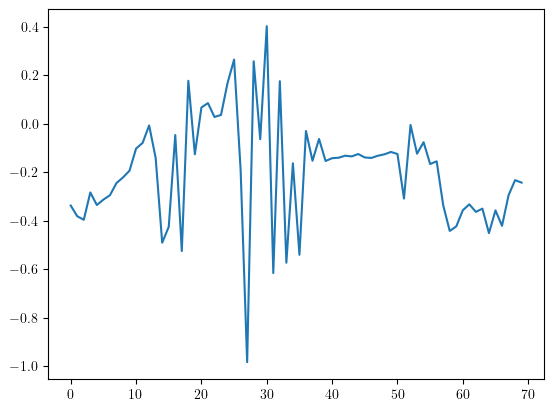

In [18]:
ji = 50
pl.figure()
# pl.plot(np.arange(x_all.shape[1]), np.std(x_all, axis = 0))
pl.plot(np.arange(x_all_norm.shape[1]), x_all_norm[ji, :])




In [19]:
inference = SNPE(prior=prior, density_estimator=neural_posterior, device = device)
density_estimator = inference.append_simulations(theta_all_norm, x_all_norm).train()
posterior = inference.build_posterior(density_estimator)
# posterior = inference.build_posterior(density_estimator)

# inferer = SNLE(prior, density_estimator="maf")
# inferer = SNRE(prior)
# inferer = inferer.append_simulations(theta_all, x_all)
# likelihood_estimator = inferer.train()
# posterior = inferer.build_posterior(mcmc_method="slice_np_vectorized", 
#                                     mcmc_parameters=dict(thin=1))




/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/sbi/utils/torchutils.py:27: UserWarning: GPU was selected as a device for training the neural network. Note that we expect **no** significant speed ups in training for the default architectures we provide. Using the GPU will be effective only for large neural networks with operations that are fast on the GPU, e.g., for a CNN or RNN `embedding_net`.
  warnings.warn(
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/sbi/utils/user_input_checks.py:711: UserWarning: Data x has device 'cpu'.Moving x to the data_device 'cuda:0'.Training will proceed on device 'cuda:0'.
  warnings.warn(
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/sbi/utils/user_input_checks.py:719: UserWarning: Parameters theta has device 'cpu'. Moving theta to the data_device 'cuda:0'.Training will proceed on device 'cuda:0'.
  warnings.warn(


 Training neural network. Epochs trained: 85

In [86]:
# isim_obs_array = np.arange(1800, 1810)  
isim_obs_array = np.arange(1800, 2000)  
# isim_obs_array = np.arange(1000, 1020)  
# isim_obs_array = np.arange(600, 630)
# isim_obs_array = np.arange(430, 460)
# isim_obs_array = np.arange(900, 925)

Om_true_all = np.zeros(len(isim_obs_array))
Om_mock_all_mean = np.zeros(len(isim_obs_array))
Om_mock_all_std = np.zeros(len(isim_obs_array))

sig8_true_all = np.zeros(len(isim_obs_array))
sig8_mock_all_mean = np.zeros(len(isim_obs_array))
sig8_mock_all_std = np.zeros(len(isim_obs_array))

samples_all_isims = np.zeros((len(isim_obs_array), 1000, len(indsel_p)))
true_all_isims = np.zeros((len(isim_obs_array), len(indsel_p)))

for ji in range(len(isim_obs_array)):
    # print(ji)
    isim_obs = isim_obs_array[ji]

    saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim_obs) + '.dill', 'rb'))    
    saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim_obs) + '.dill', 'rb'))        
    # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))    

    # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:3][:,None]
    # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:3][:,None]
    
    ihod = 0
    Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3].T
    Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3].T

    Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][1:-1]
    Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][1:-1]

    Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][1:-1]
    Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][1:-1]

    Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][1:-1]
    Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][1:-1]

    s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
    s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

    s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
    s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

    s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
    s2_truth = saved_w[pos + f'_s2_truth_{ihod}']

    # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3))
    # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))

    summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::3], s2_mock[::5]))
    summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3], s2_truth[::5]))


    theta_hod = list(saved_j[f'theta_hod_{ihod}'].values())
    theta_cosmo = list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1]
    theta_comb = np.array(theta_cosmo + theta_hod)

    # x_obs = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]            
    # x_obs = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]                

    # x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::3], s2_truth[::6]))
    # x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth, s2_truth))    
    x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth))    
    # x_obs = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock, s2_mock))
    # x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))
    # x_obs = np.concatenate((Pk_truth_ds.flatten(), s1_truth[::4], s2_truth[::6]))    
    # x_obs = Pk_truth_ds.flatten()


    # x_obs = saved_j[pos + '_Pk_truth_weighted'].flatten()[None,:]                
    theta_obs = theta_comb[None,indsel_p]

    x_obs = torch.tensor((x_obs - x_all_mean)/x_all_std).float()
    # x_obs = torch.tensor((x_obs)/x_all_std).float()    
    theta_obs = torch.tensor((theta_obs  - theta_all_mean)/theta_all_std).float()

    samples = posterior.set_default_x(x_obs).sample((1000,))

    samples_all = samples.cpu().numpy()

    samples_all_isims[ji] = samples_all
    true_all_isims[ji] = theta_obs.cpu().numpy()
    # print(theta_obs.cpu().numpy())

    theta_obs_transformed = ((theta_obs.cpu().numpy() * theta_all_std) + theta_all_mean)
    Om_true_all[ji] = theta_obs_transformed[0,0]
    # sig8_true_all[ji] = theta_obs_transformed[0,4]
    sig8_true_all[ji] = theta_obs_transformed[0,1]


    # samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)
    samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)

    Om_mock_all_mean[ji] = np.mean(samples_all_transformed[:,0])
    Om_mock_all_std[ji] = np.std(samples_all_transformed[:,0])

    # sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,4])
    # sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,4])

    sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,1])
    sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,1])




Drawing 1000 posterior samples: 100%|██████████| 1000/1000 [00:00<00:00, 115749.64it/s]
Drawing 1000 posterior samples: 1096it [00:00, 64893.03it/s]            
Drawing 1000 posterior samples: 1077it [00:00, 56988.69it/s]            
Drawing 1000 posterior samples: 1116it [00:00, 65901.38it/s]            
Drawing 1000 posterior samples: 100%|██████████| 1000/1000 [00:00<00:00, 117277.26it/s]
Drawing 1000 posterior samples: 1043it [00:00, 61599.30it/s]            
Drawing 1000 posterior samples: 1108it [00:00, 65489.82it/s]            
Drawing 1000 posterior samples: 1083it [00:00, 64178.58it/s]            
Drawing 1000 posterior samples: 1095it [00:00, 65542.55it/s]            
Drawing 1000 posterior samples: 1062it [00:00, 58494.43it/s]            
Drawing 1000 posterior samples: 1070it [00:00, 64461.02it/s]            
Drawing 1000 posterior samples: 1093it [00:00, 65437.78it/s]            
Drawing 1000 posterior samples: 1051it [00:00, 63816.86it/s]            
Drawing 1000 posterio

KeyboardInterrupt: 

In [87]:
Om_min = 0.12
Om_max = 0.48
sig8_min = 0.62
sig8_max = 0.98

# Om_min = 0.11
# Om_max = 0.49
# sig8_min = 0.61
# sig8_max = 0.99


# indsel = np.where((true_all_transformed[:,0] > Om_min) & (true_all_transformed[:,0] < Om_max) & (true_all_transformed[:,1] > sig8_min) & (true_all_transformed[:,1] < sig8_max))[0] 
indsel = np.where((Om_true_all > Om_min) & (Om_true_all < Om_max) & (sig8_true_all > sig8_min) & (sig8_true_all < sig8_max))[0]




In [88]:
import sys, os
sys.path.append('/mnt/home/spandey/ceph/tarp/src/tarp')
import drp
references = "random"
metric = 'euclidean'
bootstrap= True
norm = True
num_alpha_bins = None
num_bootstrap = 20

# samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)[:,:71, :]
# true_all_tarp = true_all_isims[:71,...]

samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)
true_all_tarp = true_all_isims


In [89]:
ecp, alpha = drp.get_tarp_coverage(
            samples_all_tarp[:,indsel, :], true_all_tarp[indsel,:],
            references=references, metric=metric,
            norm=norm, bootstrap=bootstrap,
            num_alpha_bins=num_alpha_bins,
            num_bootstrap=num_bootstrap
        )




100%|██████████| 20/20 [00:00<00:00, 235.07it/s]


In [90]:
samples_all_transformed = ((samples_all_tarp * theta_all_std) + theta_all_mean)
true_all_transformed = ((true_all_tarp * theta_all_std) + theta_all_mean)
samples_all_tarp_mean = np.mean(samples_all_transformed, axis = 0)
samples_all_tarp_std = np.std(samples_all_transformed, axis = 0)



Text(0.5, 0.98, 'Train:CHARM, Test:Quijote; Redshift space; Galaxies; $P_{\\ell = 0} + P_{\\ell = 1} + P_{\\ell = 2} + B_{\\ell = 0}$; SNPE')

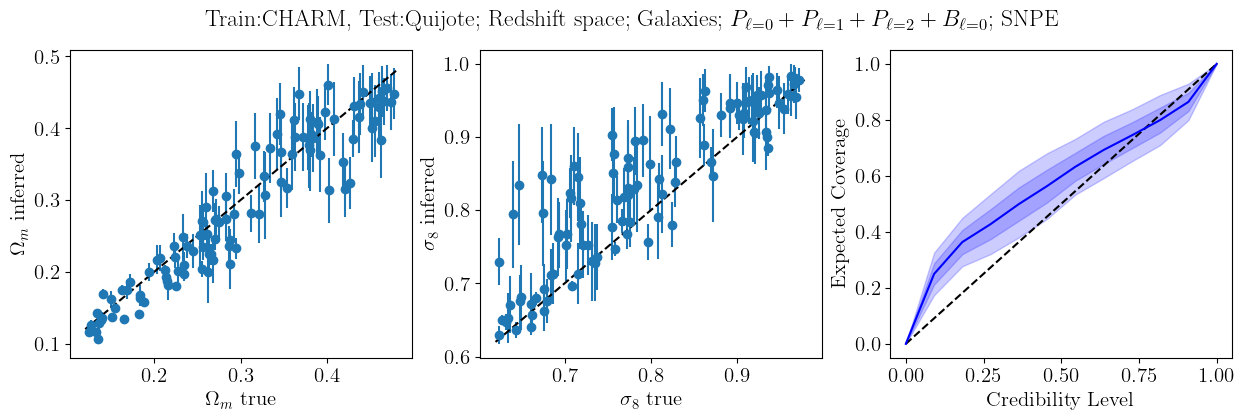

Drawing 1000 posterior samples:   6%|▌         | 57/1000 [00:20<01:51,  8.49it/s]

In [91]:
# pl.figure()
# pl.errorbar(true_all_transformed[:,-1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
# pl.plot([0.55, 1.05], [0.55, 1.05], 'k--')
# pl.xlabel(r'$\sigma_8$ true', size=15)
# pl.ylabel(r'$\sigma_8$ inferred', size=15)

# two pane figure: Om and sig8
fig, ax = pl.subplots(1, 3, figsize=(15, 4))
ax[0].errorbar(true_all_transformed[indsel,0], samples_all_tarp_mean[indsel,0], yerr = samples_all_tarp_std[indsel,0], fmt = 'o')
# ax[0].errorbar(Om_true_all[indsel], samples_all_tarp_mean[indsel,0], yerr = samples_all_tarp_std[indsel,0], fmt = 'o')
ax[0].plot([Om_min, Om_max], [Om_min, Om_max], 'k--')
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)
ax[0].set_xlabel(r'$\Omega_m$ true', size=15)
ax[0].set_ylabel(r'$\Omega_m$ inferred', size=15)

ax[1].errorbar(true_all_transformed[indsel, -1], samples_all_tarp_mean[indsel,-1], yerr = samples_all_tarp_std[indsel,-1], fmt = 'o')
ax[1].plot([sig8_min, sig8_max], [sig8_min, sig8_max], 'k--')
ax[1].set_xlabel(r'$\sigma_8$ true', size=15)
ax[1].set_ylabel(r'$\sigma_8$ inferred', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)

ax = ax[2]
ax.plot([0, 1], [0, 1], ls='--', color='k')
if bootstrap:
    ecp_mean = np.mean(ecp, axis=0)
    ecp_std = np.std(ecp, axis=0)
    ax.plot(alpha, ecp_mean, label='TARP', color='b')
    ax.fill_between(alpha, ecp_mean - ecp_std, ecp_mean + ecp_std,
                    alpha=0.2, color='b')
    ax.fill_between(alpha, ecp_mean - 2 * ecp_std, ecp_mean + 2 * ecp_std,
                    alpha=0.2, color='b')
else:
    ax.plot(alpha, ecp, label='TARP')
# ax.legend()
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel("Expected Coverage", size=15)
ax.set_xlabel("Credibility Level", size=15)
# 
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; Galaxies; $P_{\ell = 0} + P_{\ell = 1} + B_{\ell = 0}$; SNPE', size=17)
pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; Galaxies; $P_{\ell = 0} + P_{\ell = 1} + P_{\ell = 2} + B_{\ell = 0}$; SNPE', size=17)

# pl.suptitle(r'Train:CHARM, Test:Quijote; Real space; P + B + Wavelets; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + B + Wavelets; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + B + Wavelets; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + $P_{\ell = 2}$ + B + Wavelets; SNRE', size=17)




In [72]:
np.amin(true_all_transformed[indsel,-1])


0.6224999987461046

Text(0, 0.5, '$\\Omega_m$ inferred')

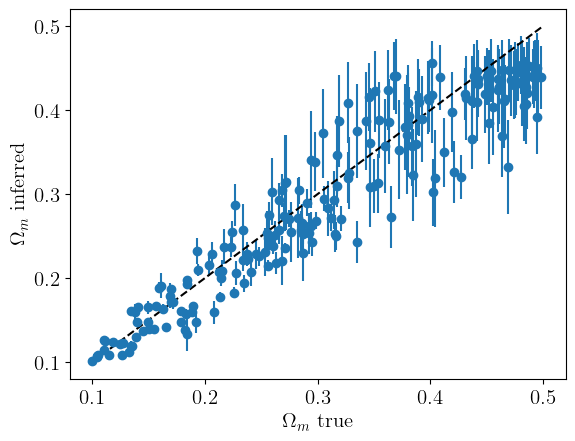

In [73]:
# samples_all_tarp.shape, true_all_tarp.shape
# true_all_tarp_repeat = np.tile(true_all_tarp, (1000, 1, 1))

samples_all_transformed = ((samples_all_tarp * theta_all_std) + theta_all_mean)
true_all_transformed = ((true_all_tarp * theta_all_std) + theta_all_mean)
samples_all_tarp_mean = np.mean(samples_all_transformed, axis = 0)
samples_all_tarp_std = np.std(samples_all_transformed, axis = 0)

pl.figure()
pl.errorbar(true_all_transformed[:,0], samples_all_tarp_mean[:,0], yerr = samples_all_tarp_std[:,0], fmt = 'o')
pl.plot([0.1, 0.5], [0.1, 0.5], 'k--')
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)


pl.xlabel(r'$\Omega_m$ true', size=15)
pl.ylabel(r'$\Omega_m$ inferred', size=15)





Text(0, 0.5, '$\\sigma_8$ inferred')

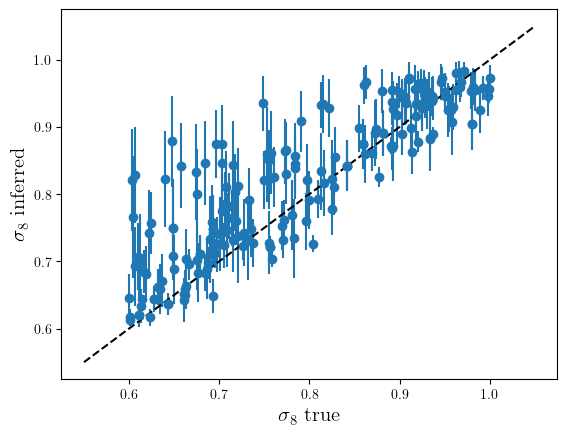

In [44]:
pl.figure()
pl.errorbar(true_all_transformed[:,-1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
pl.plot([0.55, 1.05], [0.55, 1.05], 'k--')
pl.xlabel(r'$\sigma_8$ true', size=15)
pl.ylabel(r'$\sigma_8$ inferred', size=15)




In [39]:
import pickle as pk
ldir = '/mnt/home/spandey/ceph/CHARM/results/hod_inference/'
# /mnt/home/spandey/ceph/CHARM/results/saved_nsubv_vel10k_tarp_real_Pk_mono_SNRE_data_mock.pk
# fname = ldir + 'saved_tarp_real_Pk_mono_SNRE_data_truth.pk'
# fname = ldir + 'saved_tarp_rsd_Pk_mono_SNRE_data_truth.pk'
# fname = ldir + 'saved_tarp_rsd_Pk_quad_SNRE_data_truth.pk'
# fname = ldir + 'saved_tarp_rsd_Pk_all_SNRE_data_truth.pk'

# fname = ldir + 'saved_GALAXIES_Pk_Bk_wavelets_tarp_rsd_Pk_all_wavelets_s1_s2_SNPE_nt_9_nf_60_data_mock.pk'
# fname = ldir + 'saved_GALAXIES_Pk_Bk_wavelets_tarp_rsd_Pk_all_wavelets_s1_SNRE_nt_3_nf_30_data_mock.pk'
fname = ldir + 'saved_GALAXIES_Pk_Bk_wavelets_tarp_rsd_Pk_all_wavelets_s0_s1_s2_SNLE_nt_3_nf_30_data_mock.pk'
# fname = ldir + 'saved_GALAXIES_Pk_Bk_wavelets_tarp_rsd_Pk_mono_wavelets_s1_SNRE_nt_3_nf_30_data_mock.pk'
# fname = ldir + 'saved_GALAXIES_Pk_Bk_wavelets_tarp_rsd_Pk_all_wavelets_s1_SNLE_data_mock.pk'
# fname = ldir + 'saved_GALAXIES_Pk_Bk_tarp_rsd_Pk_all_SNLE_data_truth.pk'
# fname = ldir + 'saved_nsubv_vel10k_tarp_rsd_Pk_quad_SNRE_data_mock.pk'
# fname = ldir + 'saved_nsubv_vel10k_tarp_real_Pk_mono_SNRE_data_mock.pk'
df = pk.load(open(fname, 'rb'))




In [40]:
samples_all_tarp = df['samples_all_tarp']
true_all_tarp = df['true_all_tarp']
samples_all_transformed = df['samples_all_transformed']
true_all_transformed = df['true_all_transformed']
samples_all_tarp_mean = df['samples_all_tarp_mean']
samples_all_tarp_std = df['samples_all_tarp_std']




In [53]:
Om_min = 0.11
Om_max = 0.49
sig8_min = 0.61
sig8_max = 0.99

# Om_min = 0.1
# Om_max = 0.5
# sig8_min = 0.6
# sig8_max = 1.0


indsel = np.where((true_all_transformed[:,0] > Om_min) & (true_all_transformed[:,0] < Om_max) & (true_all_transformed[:,1] > sig8_min) & (true_all_transformed[:,1] < sig8_max))[0] 




In [58]:
# import tarp
import sys, os
sys.path.append('/mnt/home/spandey/ceph/tarp/src/tarp')
import drp
references = "random"
metric = 'euclidean'
bootstrap= True
norm = True
num_alpha_bins = None
num_bootstrap = 10


ecp, alpha = drp.get_tarp_coverage(
            samples_all_tarp[:,indsel, :], true_all_tarp[indsel,:],
            references=references, metric=metric,
            norm=norm, bootstrap=bootstrap,
            num_alpha_bins=num_alpha_bins,
            num_bootstrap=num_bootstrap
        )
        



100%|██████████| 10/10 [00:00<00:00, 126.67it/s]


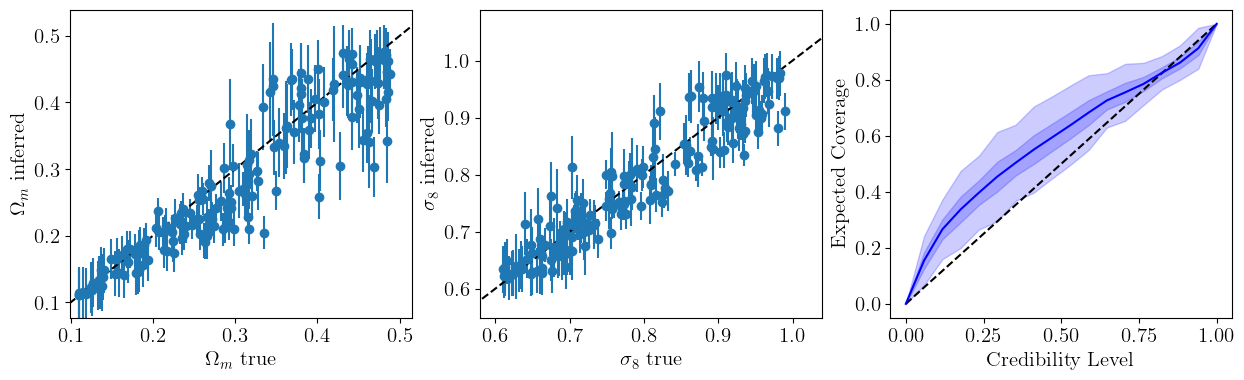

In [60]:
# pl.figure()
# pl.errorbar(true_all_transformed[:,-1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
# pl.plot([0.55, 1.05], [0.55, 1.05], 'k--')
# pl.xlabel(r'$\sigma_8$ true', size=15)
# pl.ylabel(r'$\sigma_8$ inferred', size=15)

# two pane figure: Om and sig8
fig, ax = pl.subplots(1, 3, figsize=(15, 4))
ax[0].errorbar(true_all_transformed[indsel,0], samples_all_tarp_mean[indsel,0], yerr = samples_all_tarp_std[indsel,0], fmt = 'o')
ax[0].plot([0.8*Om_min, 1.2*Om_max], [0.8*Om_min, 1.2*Om_max], 'k--')
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)
ax[0].set_xlabel(r'$\Omega_m$ true', size=15)
ax[0].set_ylabel(r'$\Omega_m$ inferred', size=15)
ax[0].set_xlim(0.9*Om_min, 1.05*Om_max)
ax[0].set_ylim(0.7*Om_min, 1.1*Om_max)

ax[1].errorbar(true_all_transformed[indsel,-1], samples_all_tarp_mean[indsel,-1], yerr = samples_all_tarp_std[indsel,-1], fmt = 'o')
ax[1].plot([0.8*sig8_min, 1.2*sig8_max], [0.8*sig8_min, 1.2*sig8_max], 'k--')
ax[1].set_xlabel(r'$\sigma_8$ true', size=15)
ax[1].set_ylabel(r'$\sigma_8$ inferred', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)
ax[1].set_xlim(0.95*sig8_min, 1.05*sig8_max)
ax[1].set_ylim(0.9*sig8_min, 1.1*sig8_max)

ax = ax[2]
ax.plot([0, 1], [0, 1], ls='--', color='k')
if bootstrap:
    ecp_mean = np.mean(ecp, axis=0)
    ecp_std = np.std(ecp, axis=0)
    ax.plot(alpha, ecp_mean, label='TARP', color='b')
    ax.fill_between(alpha, ecp_mean - ecp_std, ecp_mean + ecp_std,
                    alpha=0.2, color='b')
    ax.fill_between(alpha, ecp_mean - 3 * ecp_std, ecp_mean + 3 * ecp_std,
                    alpha=0.2, color='b')
else:
    ax.plot(alpha, ecp, label='TARP')
# ax.legend()
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel("Expected Coverage", size=15)
ax.set_xlabel("Credibility Level", size=15)

# pl.suptitle(r'Train:CHARM, Test:Quijote; Real space; P + B; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + B + Wavelets; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + B + Wavelets; SNRE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + $P_{\ell = 2}$ + B + Wavelets; SNRE', size=17)

# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + $P_{\ell = 2} + B_{\ell=0} + s^{(1)}_{\ell = 0}$; SNLE', size=17)
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0} + P_{\ell = 1} + P_{\ell = 2}  + B_{\ell=0} + s^{(0)}_{\ell = 0} + s^{(1)}_{\ell = 0} + s^{(2)}_{\ell = 0}$; SNLE', size=17)
sdir = '/mnt/home/spandey/ceph/CHARM/results/hod_inference/'
pl.savefig(sdir + 'charm_infer_galaxies_Pk_Bk_wavelets_tarp_rsd_Pk_all_wavelets_s0_s1_s2_SNLE.pdf', bbox_inches='tight')
# 
# pl.suptitle(r'Train:CHARM, Test:Quijote; Redshift space; $P_{\ell = 0} + P_{\ell = 1} + B_{\ell=0} + s^{(0)}_{\ell = 0} + s^{(1)}_{\ell = 0} + s^{(2)}_{\ell = 0}$; SNRE', size=17)



In [3]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
import yaml
import matplotlib


import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sbi import utils
from sbi import analysis
from sbi import inference
from sbi.inference import SNPE, SNLE, SNRE, simulate_for_sbi, prepare_for_sbi
from tqdm import tqdm
import pickle as pk
import dill


pos = 'rsd'
pk_type = 'all'
inference = 'SNPE'
data = 'mock'
# try:
#     do_bk = sys.argv[5]
# except:
#     do_bk = 'bk1_bk2_bk3'

do_wavelets = 's1_s2'


hidden_features = 30


num_transforms = 3


ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
pos = 'rsd'
isim_array = np.arange(0,1800)
x_all = []
x_all_truth = []
theta_all = []
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    try:
        saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
        saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
        
        for ihod in range(10):
            if pk_type == 'mono':
                Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:1].T
                Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:1].T
            
            if pk_type == 'quad':
                Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:2].T
                Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:2].T
            
            if pk_type == 'all':
                Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3].T
                Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3].T



            Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][1:-1]
            Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][1:-1]

            Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][1:-1]
            Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][1:-1]

            Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][1:-1]
            Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][1:-1]

            s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
            s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

            s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
            s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

            s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
            s2_truth = saved_w[pos + f'_s2_truth_{ihod}']

            if do_wavelets == 's0_s1_s2':
                summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s0_mock, s1_mock[::3], s2_mock[::6]))
                summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::3], s2_truth[::6]))
            elif do_wavelets == 's1_s2':
                summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::3], s2_mock[::6]))
                summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3], s2_truth[::6]))
            elif do_wavelets == 's1':
                summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::3]))
                summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3]))
            else:
                summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3))
                summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))

            theta_hod = list(saved_j[f'theta_hod_{ihod}'].values())
            theta_cosmo = list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1]
            theta_comb = np.array(theta_cosmo + theta_hod)


            if len(x_all) == 0:
                x_all = summary_concat_mock_all_weighted[None,:]
                x_all_truth = summary_concat_truth_all_weighted[None,:]            
                theta_all = theta_comb[None,:]
            else:
                # x_new = saved_j['summary_concat_mock_all'][None,:]
                # x_new_truth = saved_j['summary_concat_truth_all'][None,:]      
                #       
                # x_new = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]
                # x_new_truth = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]         

                x_new = summary_concat_mock_all_weighted[None,:]
                x_new_truth = summary_concat_truth_all_weighted[None,:]         


                # x_all = np.concatenate((x_all, saved_j['summary_concat_mock_all'][None,:]), axis = 0)
                x_all = np.concatenate((x_all, x_new), axis = 0)       
                x_all_truth = np.concatenate((x_all_truth, x_new_truth), axis = 0)       
                theta_all = np.concatenate((theta_all, theta_comb[None,:]), axis = 0)
        
    except Exception as e:
        print(e)
        pass


if data == 'truth':
    x_all = x_all_truth

x_all_std = np.std(x_all, axis = 0)
x_all_mean = np.mean(x_all, axis = 0)
theta_all_std = np.std(theta_all, axis = 0)
theta_all_mean = np.mean(theta_all, axis = 0)

indsel_p = [0, 4]

# x_all = torch.tensor(x_all).float()
# theta_all = torch.tensor(theta_all).float()
x_all = torch.Tensor((x_all - x_all_mean)/x_all_std).float()
# x_all = torch.Tensor((x_all)/x_all_std).float()
theta_all = torch.Tensor((theta_all - theta_all_mean)/theta_all_std).float()[:, indsel_p]


theta_all_std = theta_all_std[indsel_p]
theta_all_mean = theta_all_mean[indsel_p]


prior = utils.BoxUniform(
    low=(torch.tensor((np.array([0.1, 0.03, 0.5, 0.8, 0.6])[indsel_p]  - theta_all_mean)/theta_all_std)), 
    high=torch.tensor((np.array([0.5, 0.07, 0.9, 1.2, 1.0])[indsel_p] - theta_all_mean)/theta_all_std)
)

if inference == 'SNPE':
    neural_posterior = utils.posterior_nn(model="maf", hidden_features=hidden_features, num_transforms=num_transforms)
    inferer = SNPE(prior=prior, density_estimator=neural_posterior)
    density_estimator = inferer.append_simulations(theta_all, x_all).train()
    posterior = inferer.build_posterior(density_estimator)

if inference == 'SNLE':
    inferer = SNLE(prior, density_estimator="maf")
    inferer = inferer.append_simulations(theta_all, x_all)
    likelihood_estimator = inferer.train()
    posterior = inferer.build_posterior(mcmc_method="slice_np_vectorized", 
                                        mcmc_parameters=dict(thin=1))

if inference == 'SNRE':
    inferer = SNRE(prior)
    inferer = inferer.append_simulations(theta_all, x_all)
    likelihood_estimator = inferer.train()
    posterior = inferer.build_posterior(mcmc_method="slice_np_vectorized", 
                                        mcmc_parameters=dict(thin=1))


isim_obs_array = np.arange(1800, 2000)  
# isim_obs_array = np.arange(1000, 1020)  
# isim_obs_array = np.arange(600, 630)
# isim_obs_array = np.arange(430, 460)
# isim_obs_array = np.arange(900, 925)

Om_true_all = np.zeros(len(isim_obs_array))
Om_mock_all_mean = np.zeros(len(isim_obs_array))
Om_mock_all_std = np.zeros(len(isim_obs_array))

sig8_true_all = np.zeros(len(isim_obs_array))
sig8_mock_all_mean = np.zeros(len(isim_obs_array))
sig8_mock_all_std = np.zeros(len(isim_obs_array))

samples_all_isims = np.zeros((len(isim_obs_array), 1000, len(indsel_p)))
true_all_isims = np.zeros((len(isim_obs_array), len(indsel_p)))


for ji in range(len(isim_obs_array)):
    # print(ji)
    isim_obs = isim_obs_array[ji]

    saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim_obs) + '.dill', 'rb'))
    saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))        
    # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))    

    # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:3][:,None]
    # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:3][:,None]
    
    ihod = 0
    if pk_type == 'mono':
        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:1].T
        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:1].T
    
    if pk_type == 'quad':
        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:2].T
        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:2].T
    
    if pk_type == 'all':
        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3].T
        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3].T

    Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][1:-1]
    Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][1:-1]

    Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][1:-1]
    Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][1:-1]

    Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][1:-1]
    Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][1:-1]

    s0_mock = saved_w[pos + f'_s0_mock_{ihod}']
    s0_truth = saved_w[pos + f'_s0_truth_{ihod}']

    s1_mock = saved_w[pos + f'_s1_mock_{ihod}']
    s1_truth = saved_w[pos + f'_s1_truth_{ihod}']

    s2_mock = saved_w[pos + f'_s2_mock_{ihod}']
    s2_truth = saved_w[pos + f'_s2_truth_{ihod}']


    # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3))
    # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))

    theta_hod = list(saved_j[f'theta_hod_{ihod}'].values())
    theta_cosmo = list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1]
    theta_comb = np.array(theta_cosmo + theta_hod)

    

    if do_wavelets == 's0_s1_s2':
        x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::3], s2_truth[::6]))
    elif do_wavelets == 's1_s2':
        x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3], s2_truth[::6]))
    elif do_wavelets == 's1':
        x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::3]))
    else:
        x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3))


    # x_obs = saved_j[pos + '_Pk_truth_weighted'].flatten()[None,:]                
    theta_obs = theta_comb[None,indsel_p]

    x_obs = torch.tensor((x_obs - x_all_mean)/x_all_std).float()
    # x_obs = torch.tensor((x_obs)/x_all_std).float()    
    theta_obs = torch.tensor((theta_obs  - theta_all_mean)/theta_all_std).float()

    samples = posterior.set_default_x(x_obs).sample((1000,))

    samples_all = samples.cpu().numpy()

    samples_all_isims[ji] = samples_all
    true_all_isims[ji] = theta_obs.cpu().numpy()
    # print(theta_obs.cpu().numpy())

    theta_obs_transformed = ((theta_obs.cpu().numpy() * theta_all_std) + theta_all_mean)
    Om_true_all[ji] = theta_obs_transformed[0,0]
    # sig8_true_all[ji] = theta_obs_transformed[0,4]
    sig8_true_all[ji] = theta_obs_transformed[0,1]


    # samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)
    samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)

    Om_mock_all_mean[ji] = np.mean(samples_all_transformed[:,0])
    Om_mock_all_std[ji] = np.std(samples_all_transformed[:,0])

    # sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,4])
    # sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,4])

    sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,1])
    sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,1])


references = "random"
metric = 'euclidean'
bootstrap= True
norm = True
num_alpha_bins = None
num_bootstrap = 20

# samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)[:,:71, :]
# true_all_tarp = true_all_isims[:71,...]

samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)
true_all_tarp = true_all_isims

samples_all_transformed = ((samples_all_tarp * theta_all_std) + theta_all_mean)
true_all_transformed = ((true_all_tarp * theta_all_std) + theta_all_mean)
samples_all_tarp_mean = np.mean(samples_all_transformed, axis = 0)
samples_all_tarp_std = np.std(samples_all_transformed, axis = 0)

saved = {'samples_all_tarp': samples_all_tarp, 'true_all_tarp': true_all_tarp, 
        'theta_all_std': theta_all_std, 'theta_all_mean': theta_all_mean,
        'samples_all_tarp_mean': samples_all_tarp_mean, 'samples_all_tarp_std': samples_all_tarp_std,
        'samples_all_transformed': samples_all_transformed, 'true_all_transformed': true_all_transformed}
        
import pickle as pk
# pk.dump(saved, open(f'/mnt/home/spandey/ceph/CHARM/results/hod_inference/saved_GALAXIES_Pk_Bk_wavelets_tarp_{pos}_Pk_{pk_type}_wavelets_{do_wavelets}_{inference}_data_{data}.pk', 'wb'))
pk.dump(saved, open(f'/mnt/home/spandey/ceph/CHARM/results/hod_inference/saved_GALAXIES_Pk_Bk_wavelets_tarp_{pos}_Pk_{pk_type}_wavelets_{do_wavelets}_{inference}_nt_{num_transforms}_nf_{hidden_features}_data_{data}.pk', 'wb'))

import sys, os
sys.path.append('/mnt/home/spandey/ceph/tarp/src/tarp')
import drp

ecp, alpha = drp.get_tarp_coverage(
            samples_all_tarp, true_all_tarp,
            references=references, metric=metric,
            norm=norm, bootstrap=bootstrap,
            num_alpha_bins=num_alpha_bins,
            num_bootstrap=num_bootstrap
        )

sdirf = '/mnt/home/spandey/ceph/CHARM/results/hod_inference/'

Om_min = 0.12
Om_max = 0.48
sig8_min = 0.62
sig8_max = 0.98
indsel = np.where((Om_true_all > Om_min) & (Om_true_all < Om_max) & (sig8_true_all > sig8_min) & (sig8_true_all < sig8_max))[0]

fig, ax = pl.subplots(1, 3, figsize=(15, 4))
ax[0].errorbar(true_all_transformed[:,0], samples_all_tarp_mean[:,0], yerr = samples_all_tarp_std[:,0], fmt = 'o')
ax[0].plot([Om_min, Om_max], [Om_min, Om_max], 'k--')
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)
ax[0].set_xlabel('Om true', size=15)
ax[0].set_ylabel('Om inferred', size=15)

ax[1].errorbar(true_all_transformed[:, -1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
ax[1].plot([sig8_min, sig8_max], [sig8_min, sig8_max], 'k--')
ax[1].set_xlabel('sig8 true', size=15)
ax[1].set_ylabel('sig8 inferred', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)

ax = ax[2]
ax.plot([0, 1], [0, 1], ls='--', color='k')
if bootstrap:
    ecp_mean = np.mean(ecp, axis=0)
    ecp_std = np.std(ecp, axis=0)
    ax.plot(alpha, ecp_mean, label='TARP', color='b')
    ax.fill_between(alpha, ecp_mean - ecp_std, ecp_mean + ecp_std,
                    alpha=0.2, color='b')
    ax.fill_between(alpha, ecp_mean - 2 * ecp_std, ecp_mean + 2 * ecp_std,
                    alpha=0.2, color='b')
else:
    ax.plot(alpha, ecp, label='TARP')
# ax.legend()
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel("Expected Coverage", size=15)
ax.set_xlabel("Credibility Level", size=15)
# pl.savefig(sdirf + f'Om_sig8_TARP_inferred_saved_GALAXIES_Pk_Bk_wavelets_{pos}_Pk_{pk_type}_wavelets_{do_wavelets}_{inference}_nt_{num_transforms}_nf_{hidden_features}_data_{data}.pdf', bbox_inches='tight')


cuda


100%|██████████| 1800/1800 [02:19<00:00, 12.93it/s]


 Neural network successfully converged after 102 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]WARNING:root:Only 0.000% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    1000 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
Drawing 1000 posterior samples: 100%|██████████| 1000/1000 [08:54<00:00,  1.87it/s]
Drawing 1000 posterior samples: 1054it [00:00, 148758.21it/s]           
Drawing 1000 posterior samples: 1049it [00:00, 101833.65it/s]           
Drawing 1000 posterior samples: 1047it [00:00, 82290.57it/s]            
Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]WARNING:root:Only 0.009% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    999 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
Drawing 1000

KeyboardInterrupt: 

In [12]:
import wandb
from ruamel import yaml
wandb.login()



True

In [63]:
import numpy as np
import yaml
import ast
import math
fname = '/mnt/home/spandey/ceph/CHARM/charm/sweep/config_wandb_snle.yaml'
config_data = yaml.safe_load(open(fname, 'r'))
params_all = config_data['parameters']
n_configs = config_data['num_configs']
for jc in range(n_configs):
    saved_config = {}
    for param_name in list(params_all.keys()):
        param = params_all[param_name]
        distribution = param['distribution']
        if distribution == 'q_log_uniform_values':
            if param_name == 'lr':
                min_val = float(param['min'])
                max_val = float(param['max'])
                base_log = float(param['q'])
                param_rand_val = round(round(np.exp((np.random.rand())*(np.log(max_val) - np.log(min_val)) + np.log(min_val))/base_log)*base_log, 7)
            else:
                min_val = int(param['min'])
                max_val = int(param['max'])
                base_log = int(param['q'])
                param_rand_val = round(np.exp((np.random.rand())*(np.log(max_val) - np.log(min_val)) + np.log(min_val))/base_log)*base_log
        
        if distribution == 'int_uniform':
            min_val = int(param['min'])
            max_val = int(param['max'])
            param_rand_val = np.random.randint(min_val, max_val+1)
        
        saved_config[param_name] = param_rand_val
    
    config_fname = f'/mnt/home/spandey/ceph/CHARM/charm/sweep/snle_configs/config_{jc}.yaml'
    with open(config_fname, 'w') as outfile:
        yaml.dump(saved_config, outfile, default_flow_style=False)



In [56]:
# param
# params_all
# param['min']
# saved_config
# math.log(min_val)/math.log(base_log)
# base_log
# min_val, base_log
# min_val
# math.log(64,8)
# base_log = 2
round(np.exp((np.random.rand())*(np.log(max_val) - np.log(min_val)) + np.log(min_val))/8)*8
# np.exp(np.arange(math.log(min_val, base_log), math.log(max_val,base_log), base_log))
# max_val/min_val
# np.exp(np.linspace(np.log(min_val), np.log(max_val), num=(np.log(max_val)/np.log(min_val)).astype(int)))


208

In [41]:
# (np.log(max_val)/np.log(min_val))
# max_val, min_val
# math.log(min_val, base_log)
# math.log(max_val,base_log)
np.arange(math.log(min_val, base_log), math.log(max_val,base_log), base_log)

array([4., 6.])

In [20]:
import numpy as np
import sys, os
import wandb
from ruamel import yaml
# sys.path.append('../../src/')
# import loader_pk, loader_pk_splits, loader_wv, loader_wv_splits
wandb.login()

#initialize sweep
# from yaml import Loader, Dumper
import yaml
# cfgd = yaml.load(open(f'/mnt/home/spandey/ceph/CHARM/charm/wandb/config_wandb_snle.yaml'), Loader=yaml.Loader)
sweep_id = wandb.sweep(sweep=yaml.load(open(f'/mnt/home/spandey/ceph/CHARM/charm/wandb/config_wandb_snle.yaml', 'rb'), Loader=yaml.Loader)
                        )
print("Schedule sweep with id : ", sweep_id)
cfgd['sweep'] = {'id' : sweep_id}
nmodels = 1




403 response executing GraphQL.
{"errors":[{"message":"permission denied","path":["upsertSweep"],"extensions":{"code":"PERMISSION_ERROR"}}],"data":{"upsertSweep":null}}
wandb: ERROR Error while calling W&B API: permission denied (<Response [403]>)


UsageError: permission denied

404 response executing GraphQL.
{"errors":[{"message":"entity not found during upsertSweep","path":["upsertSweep"]}],"data":{"upsertSweep":null}}
wandb: ERROR Error while calling W&B API: entity not found during upsertSweep (<Response [404]>)


UsageError: entity not found during upsertSweep